## 隨機森林


### 原理
它是集合多棵決策樹來進行預測，很多樹就成為了森林，稱之為隨機森林。每一棵樹只能看見部分特徵，但透過多顆樹來蒐集和統合資料，可以比決策樹不容易過度擬合，並且讓預測能力提升。

從訓練集使用Bootstrap抽後放回，抽 n‘ 筆資料後隨機選 m 個 特徵作為訓練資料樣本。重複 k 次之後可以產生 k 顆決策樹，最後再用投票機制來進行預測。

### 優色

- 多顆決策樹可以彌平單一決策樹會過度擬合的缺點
- 每棵樹的資料和特徵都是隨機
- 每棵樹都是獨立，因此可以平行化運算
- 利用群眾智慧提供預測準確率




### 實作隨機森林

In [3]:
# Random Forest Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Book_Purchased.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 5].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0 )
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[58  9]
 [ 6 27]]


In [4]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        67
           1       0.75      0.82      0.78        33

    accuracy                           0.85       100
   macro avg       0.83      0.84      0.83       100
weighted avg       0.85      0.85      0.85       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


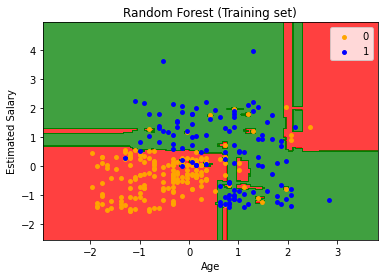

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


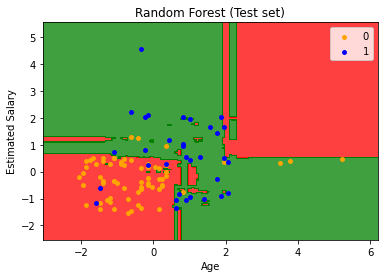

CPU times: user 39.1 s, sys: 2.11 s, total: 41.2 s
Wall time: 41 s


In [5]:
%%time
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'blue'))(i), label = j, s=15)
plt.title('Random Forest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'blue'))(i), label = j, s=15)
plt.title('Random Forest (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### 隨機森林的樹壯圖

Accuracy: 87.5%


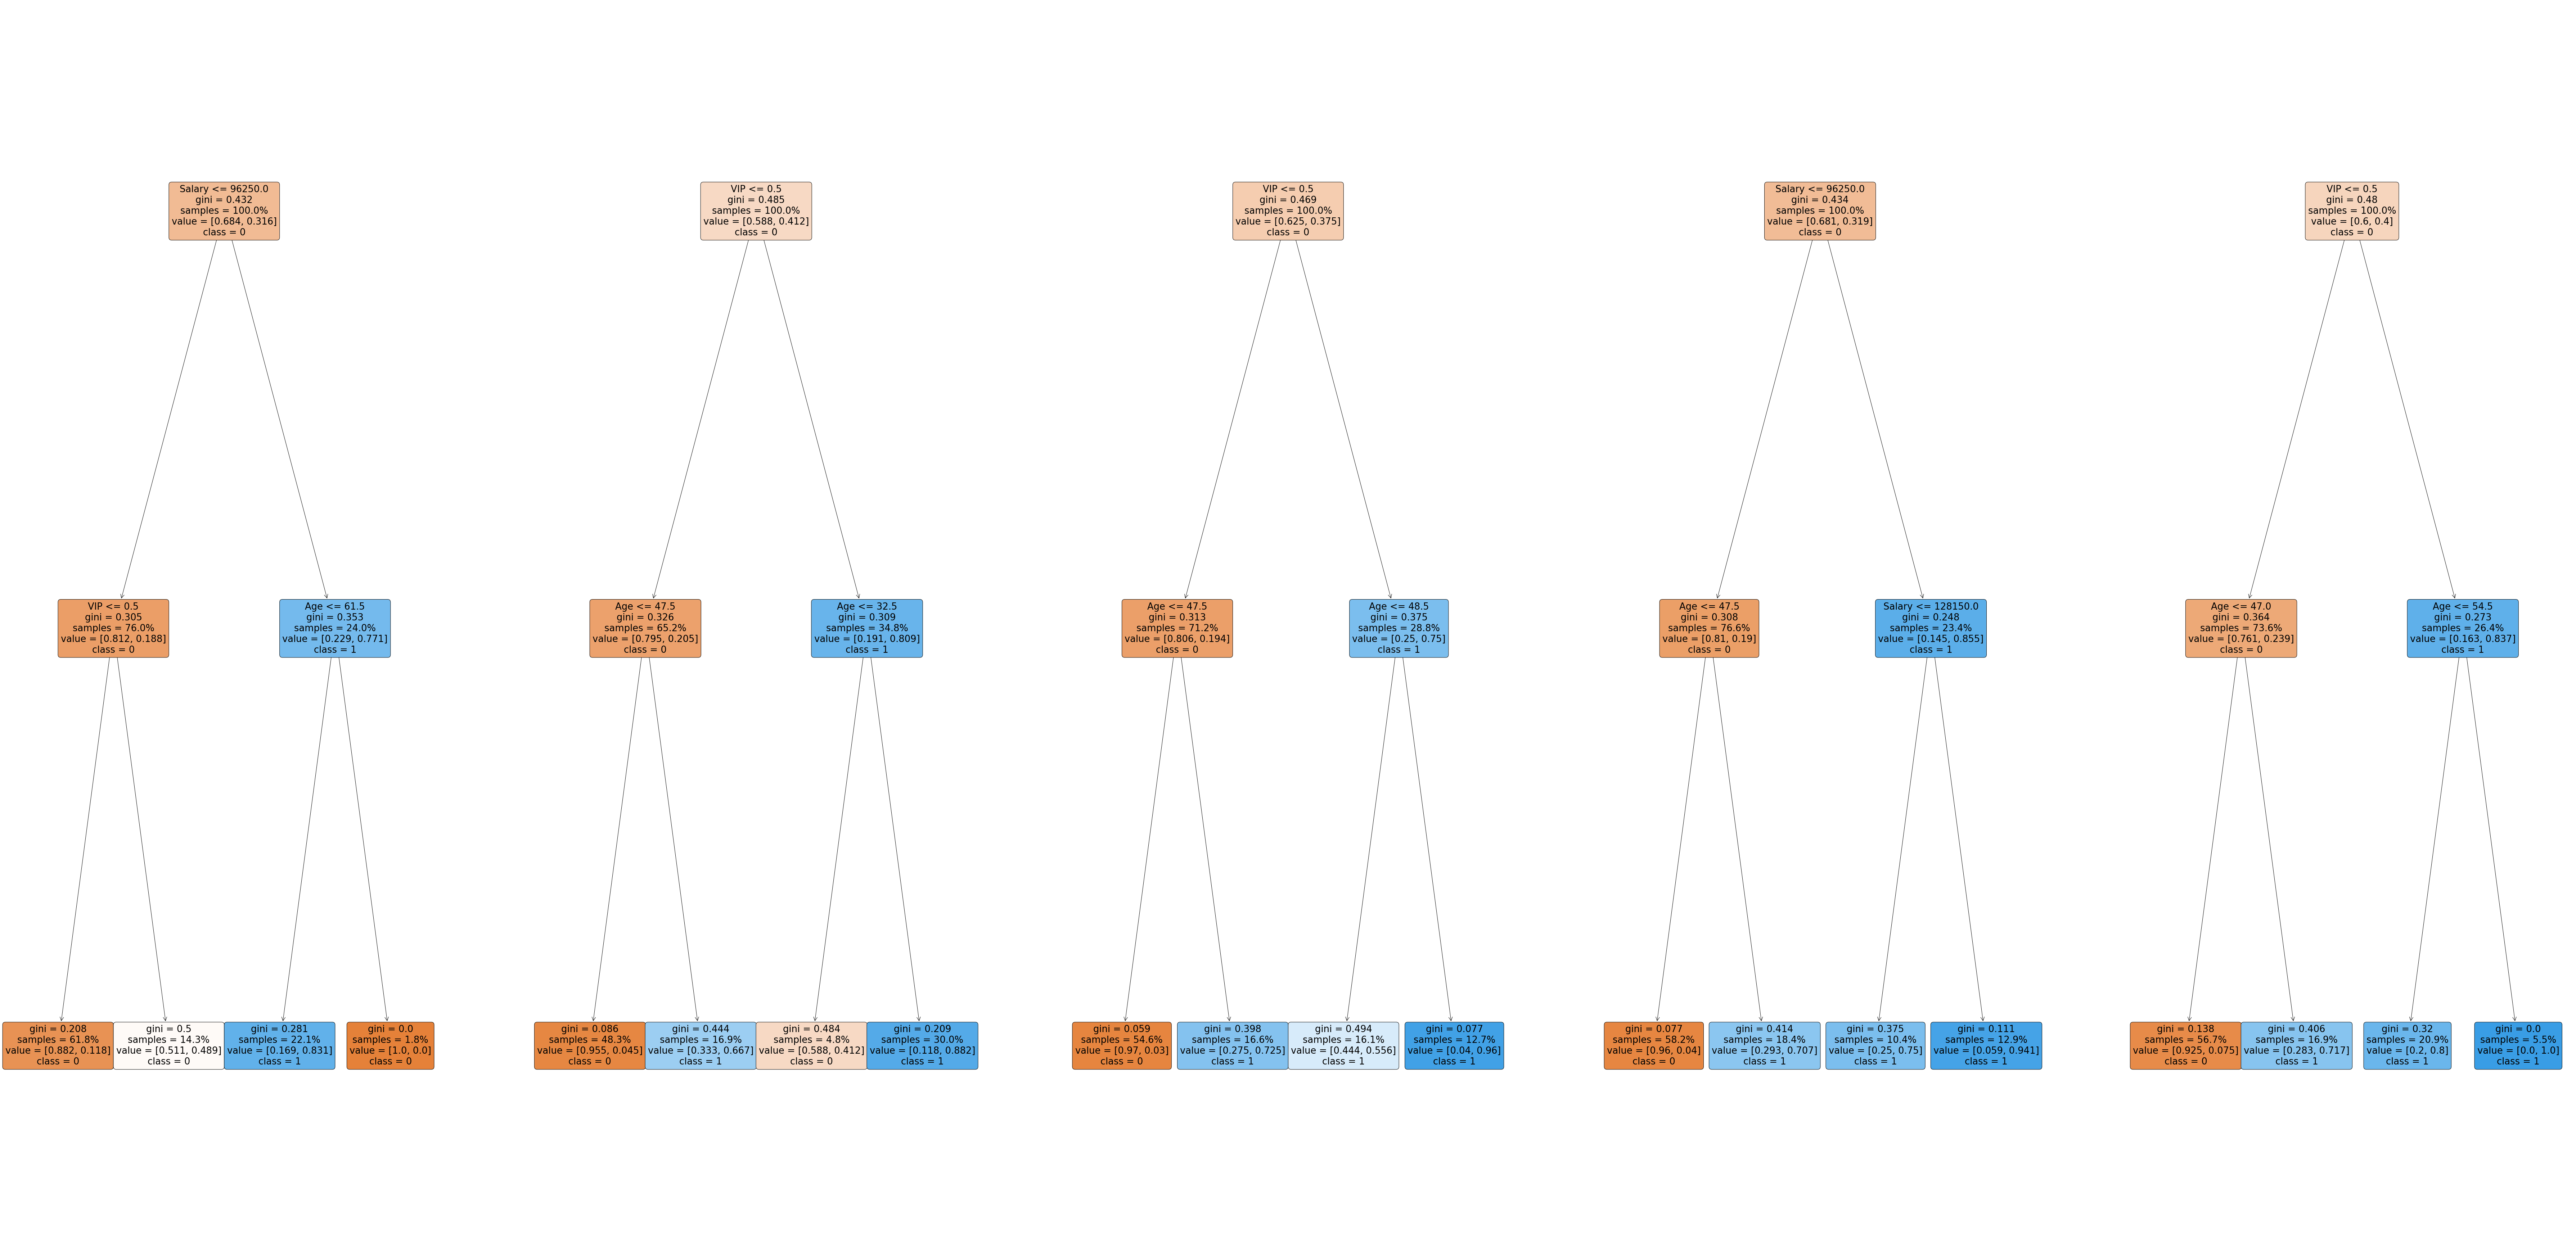

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

dataset = pd.read_csv('Book_Purchased.csv')
dataset['Purchased'] = dataset['Purchased'].astype('str')
X = dataset.iloc[:, [2, 3, 4]].values
y = dataset.iloc[:, 5].values
feature_names = np.array(dataset.columns.tolist()[2:5])  # 取出特徵名稱
class_names = dataset.Purchased.unique() # 取出標籤/分類名稱
dx_train, dx_test, dy_train, dy_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 訓練隨機森林 (每個 2 層) 並預測結果
t = 5  # 選擇決策樹數量
model = RandomForestClassifier(n_estimators=t, max_depth=2)
model.fit(dx_train, dy_train)
predict = model.predict(dx_test)
test_score = model.score(dx_test, dy_test) * 100
print(f'Accuracy: {test_score:.1f}%')

# 走訪和繪製隨機森林的所有決策樹
plt.figure(figsize=(128, 64))
for idx, dec_tree in enumerate(model.estimators_):
    plt.subplot(1, t, idx+1)
    tree.plot_tree(dec_tree, 
                   filled=True, rounded=True, proportion=True,
                   feature_names=feature_names,
                   class_names=class_names)
plt.savefig('forest.jpg')

### 比較目前所學的演算法

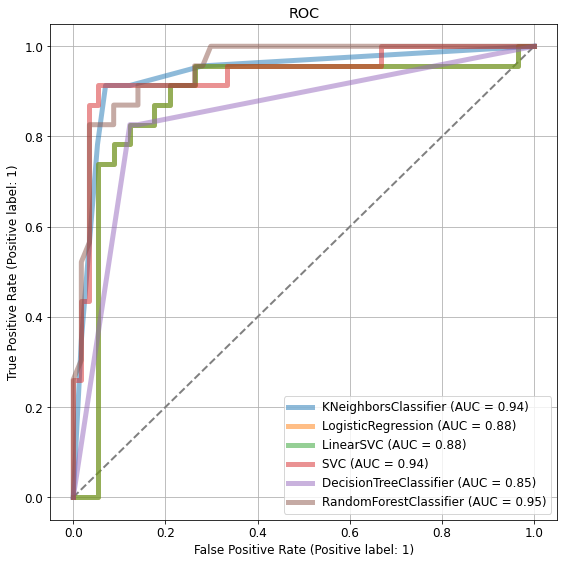

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('Book_Purchased.csv')
dataset['Purchased'] = dataset['Purchased'].astype('str')
dx = dataset.iloc[:, [2, 3, 4]].values
dy = dataset.iloc[:, 5].values
dx = PCA(n_components=2).fit_transform(dx)
dx = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size=0.2, random_state=0)

# 建立不同模型
models = [
    KNeighborsClassifier(),
    LogisticRegression(),
    LinearSVC(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ]
# 訓練不同模型
for i, _ in enumerate(models):
    models[i].fit(dx_train, dy_train)
plt.rcParams['font.size'] = 12
plt.figure(figsize=(8, 8))
# 建立子圖表
ax = plt.subplot(111)
ax.set_title('ROC')
# 畫對角線
ax.plot([0, 1], [0, 1], color='grey',
        linewidth=2, linestyle='--')
# 對每個模型畫 ROC 曲線
for model in models:
    plot_roc_curve(model, dx_test, dy_test,
                   linewidth=5, alpha=0.5, ax=ax)
plt.grid(True)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.tight_layout()
plt.show()